In [1]:
!pip install gymnasium
# مكتبة للتعامل مع البيئات المتقدمة
!pip install swig
# مكتبة محاكاة الأجسام ثنائية الأبعاد
!pip install gymnasium[box2d]
# تحديث مكتبة الأفلام
!pip install --upgrade moviepy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
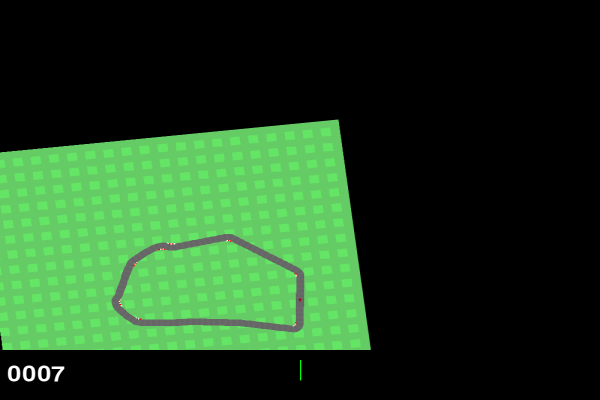

In [3]:
import gymnasium as gym
# إنشاء البيئة
env = gym.make("CarRacing-v3", render_mode="rgb_array")
#إعادة تهيئة البيئة
env.reset()
# الإظهار
env.render()

Total reward: -23.07692307692326
Total moves: 1000


array([[[101, 203, 101],
        [101, 203, 101],
        [101, 203, 101],
        ...,
        [101, 203, 101],
        [101, 203, 101],
        [101, 203, 101]],

       [[101, 203, 101],
        [101, 203, 101],
        [101, 203, 101],
        ...,
        [101, 203, 101],
        [101, 203, 101],
        [101, 203, 101]],

       [[101, 203, 101],
        [101, 203, 101],
        [101, 203, 101],
        ...,
        [101, 203, 101],
        [101, 203, 101],
        [101, 203, 101]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
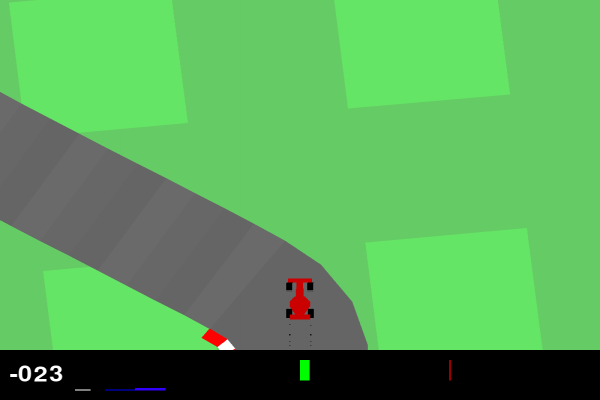

In [4]:
# معامل منطقي للخروج من الحلقة
done = False
# إجمالي مكافآت الحلقة
total_reward = 0
# عدد الحركات
moves = 0

# الدوران في حلقة
while not done:
    # اختيار فعل بشكل عشوائي
    action = env.action_space.sample()

    # تنفيذ الفعل
    state, reward, terminated, truncated, info = env.step(action)

    # تحديث المكافآت
    total_reward = total_reward + reward
    # نحديث الحركات
    moves = moves + 1

    # اختبار الانتهاء
    if terminated or truncated:
        done = True

# طباعة إجمالي المكافآت والحركات
print(f"Total reward: {total_reward}")
print(f"Total moves: {moves}")

# عرض البيئة
env.render()


In [5]:
# مسار مجلد الفيديويات
working_folder='/content/drive/MyDrive/CarRacingVideos/'

In [6]:
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

num_eval_episodes = 2

env = RecordVideo(env, video_folder="working_folder", name_prefix="random",
                  episode_trigger=lambda x: True)

env = RecordEpisodeStatistics(env, buffer_length=num_eval_episodes)

for episode_num in range(num_eval_episodes):
    obs, info = env.reset()
    # مؤشر الخروح من الحلقة
    episode_over = False
    # الدوران في حلقة
    while not episode_over:
        action = env.action_space.sample()  # replace with actual agent
        obs, reward, terminated, truncated, info = env.step(action)
        # تحديث مؤشر الخروح من الحلقة
        episode_over = terminated or truncated


# طباعة الإحصائيات
print(f'Episode time taken: {env.time_queue}')
print(f'Episode total rewards: {env.return_queue}')
print(f'Episode lengths: {env.length_queue}')

# إغلاق البيئة
env.close()

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/working_folder folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Episode time taken: deque([22.719096, 22.549404], maxlen=2)
Episode total rewards: deque([-34.21052631579001, -39.682539682540295], maxlen=2)
Episode lengths: deque([1000, 1000], maxlen=2)
